Loading data...
Preprocessing data...
Building the 1D CNN model...


C:\Users\sande\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 120, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3840)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         245,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │           2,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,680 (971.41 KB)

 Trainable params: 248,680 (971.41 KB)

 Non-trainable params: 0 (0.00 B)


Training the CNN model...
Epoch 1/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9579 - loss: 0.2253 - val_accuracy: 0.9881 - val_loss: 0.0431
Epoch 2/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9889 - loss: 0.0435 - val_accuracy: 0.9909 - val_loss: 0.0325
Epoch 3/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9909 - loss: 0.0312 - val_accuracy: 0.9918 - val_loss: 0.0281
Epoch 4/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9918 - loss: 0.0286 - val_accuracy: 0.9942 - val_loss: 0.0225
Epoch 5/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9928 - loss: 0.0249 - val_accuracy: 0.9934 - val_loss: 0.0206
Epoch 6/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9929 - loss: 0.0236 - val_accuracy: 0.9940 - val_loss: 0.0205
Epoch 7/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9945 - loss: 0.0193 - val_accuracy: 0.9921 - val_loss: 0.0250
Epoch 8/10
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/s

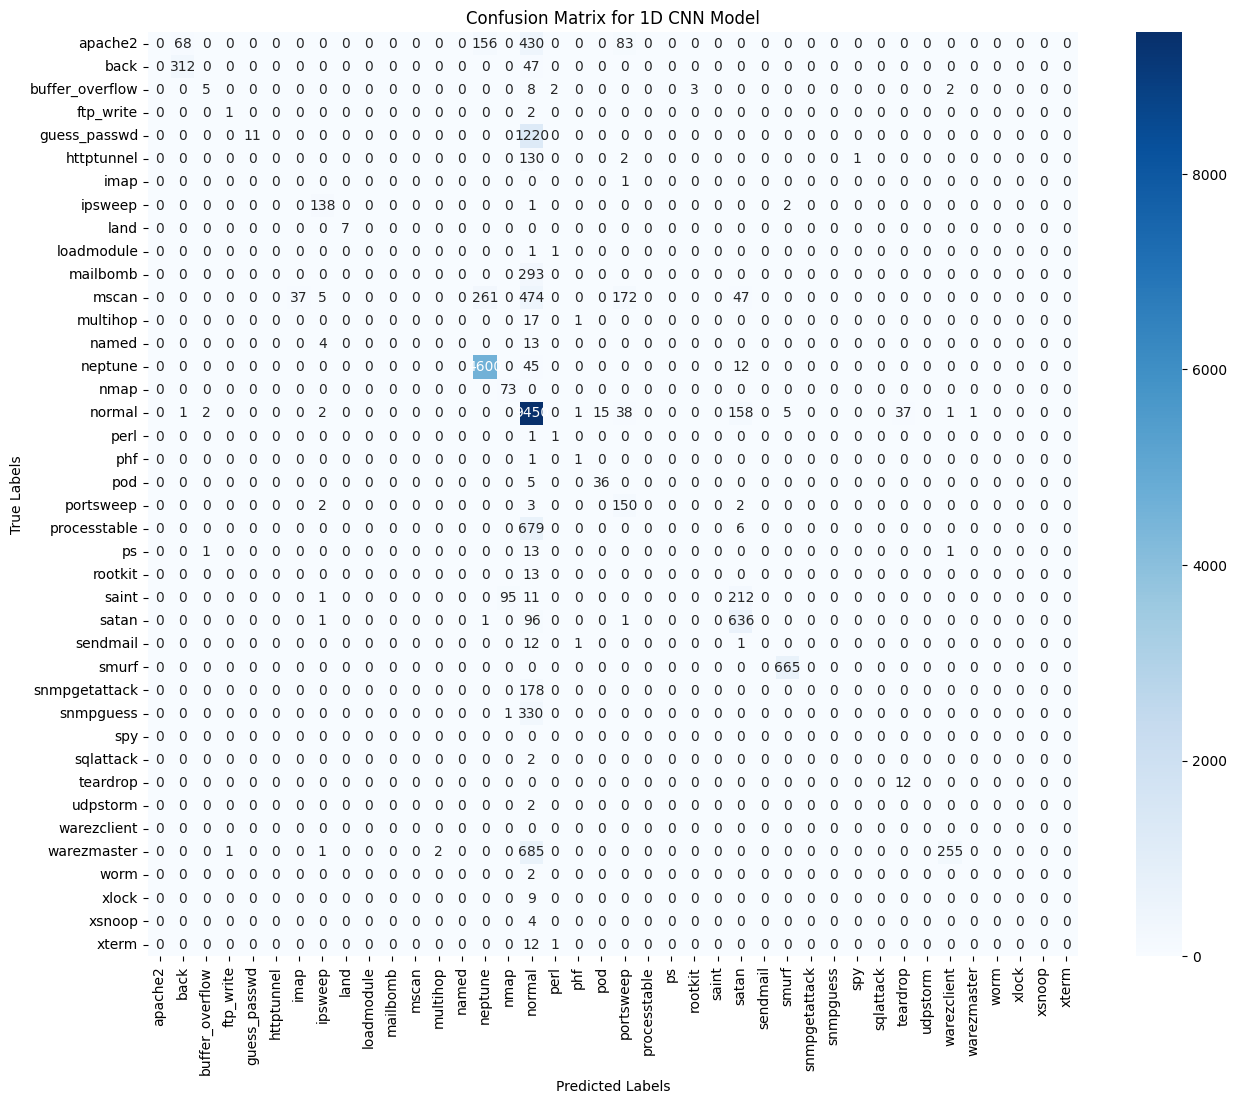

In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# This code assumes you have 'KDDTrain+.txt' and 'KDDTest+.txt' in the same folder.

# 2. Load the Training and Testing Datasets
col_names = [f"feature_{i}" for i in range(41)] + ['label', 'difficulty']
print("Loading data...")
train_df = pd.read_csv('KDDTrain+.txt', header=None, names=col_names)
test_df = pd.read_csv('KDDTest+.txt', header=None, names=col_names)

# 3. Prepare the Data
train_df = train_df.drop('difficulty', axis=1)
test_df = test_df.drop('difficulty', axis=1)

X_train = train_df.drop('label', axis=1)
y_train_str = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test_str = test_df['label']

# --- Preprocessing ---
print("Preprocessing data...")
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns
train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0
X_test = X_test[X_train.columns]

# Scale Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode Labels
all_labels = pd.concat([y_train_str, y_test_str])
le = LabelEncoder()
le.fit(all_labels)
y_train_encoded = le.transform(y_train_str)
y_test_encoded = le.transform(y_test_str)
num_classes = len(le.classes_)

# One-Hot Encode Labels for Keras
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

# CRUCIAL: Reshape data for 1D CNN input -> (samples, features, 1)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# 4. Build and Compile the 1D CNN Model
print("Building the 1D CNN model...")
model = Sequential()
# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
# Add a pooling layer
model.add(MaxPooling1D(pool_size=2))
# Flatten the output to feed into a dense layer
model.add(Flatten())
# Add a standard fully connected layer
model.add(Dense(64, activation='relu'))
# Add the final output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 5. Train the Model
print("\nTraining the CNN model...")
model.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=64, validation_split=0.1)
print("Model training complete.")

# 6. Make Predictions and Evaluate
print("Making predictions...")
y_pred_proba = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_proba, axis=1)

# 7. Print Final Reports
print("\n--- CNN Model Performance ---")
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_, labels=range(num_classes), zero_division=0))

print("Generating Confusion Matrix...")
cm = confusion_matrix(y_test_encoded, y_pred, labels=range(num_classes))
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for 1D CNN Model')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [2]:
 from sklearn.metrics import precision_score, recall_score, f1_score

# --- Calculate the overall scores using the 'weighted' average ---

# This calculates the average precision, weighted by the number of samples in each class.
overall_precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)

# This calculates the average recall, weighted by the number of samples in each class.
overall_recall = recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0)

# This calculates the average F1-score, weighted by the number of samples in each class.
overall_f1 = f1_score(y_test_encoded, y_pred, average='weighted', zero_division=0)


# --- Print the results ---
print("\n--- Overall Performance Metrics ---")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-Score: {overall_f1:.4f}")


--- Overall Performance Metrics ---
Overall Precision: 0.6041
Overall Recall: 0.7141
Overall F1-Score: 0.6174
